# **1) Contexto del Problema**

Pídale a un comprador de vivienda que describa la casa de sus sueños, y probablemente no comenzará con la altura del techo del sótano o la proximidad a un ferrocarril de este a oeste. Pero el conjunto de datos de esta competencia en el patio de recreo demuestra que influye mucho más en las negociaciones de precios que el número de dormitorios o una valla blanca.

Con 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, esta competencia lo desafía a predecir el precio final de cada casa.

El conjunto de datos de Ames Vivienda fue compilado por Dean De Cock para su uso en la educación científica de datos. Es una alternativa increíble para los científicos de datos que buscan una versión modernizada y ampliada del conjunto de datos de Boston Housing que se cita a menudo.
http://jse.amstat.org/v19n3/decock.pdf

# **2) Conocimiento de Datos** 

**Importar Librerias**

In [ ]:
import numpy as np # Calculos Matematicos
import pandas as pd # Depuracion de Datos
import matplotlib.pyplot as plt # Graficos Estadisticos
import seaborn as sns # Graficos Estadisticos
from scipy.stats import  shapiro # Pruebas de Hipotesis 
from scipy.stats import chi2_contingency # Pruebas Hipotesis

# Modelacion es Ml
from sklearn.model_selection import train_test_split # Dividir la data en entraniemo y prueba

**Importar los datos**

Descripciones de archivos:

* train.csv : el conjunto de entrenamiento
* test.csv : el conjunto Activo
* data_description.txt : descripción completa de cada columna, originalmente preparada por Dean De Cock pero ligeramente editada para que coincida con los nombres de columna utilizados aquí

In [ ]:
# Historia 
df = pd.read_csv("/content/drive/MyDrive/Diplomado_2021_01/Análisis Descriptivo y Exploratorio/Insumos/House_Price/train.csv")
# Casas Activas, para predecir su precio
df_1 = pd.read_csv("/content/drive/MyDrive/Diplomado_2021_01/Análisis Descriptivo y Exploratorio/Insumos/House_Price/test.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Revisamos los Datos**

[** dimension de la data**]

In [ ]:
df.shape

(1460, 81)

**Dimension Data Activa**

In [ ]:
df_1.shape

(1459, 80)

**Extructura**

In [ ]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Diccionario de la Base de Datos**

Campos de información
Aquí hay una versión breve de lo que encontrará en el archivo de descripción de datos.

* SalePrice : el precio de venta de la propiedad en dólares. Esta es la variable objetivo que está tratando de predecir.
* MSSubClass : la clase de construcción
* MSZoning : la clasificación general de zonificación
* LotFrontage : pies lineales de calle conectados a la propiedad
* LotArea : Tamaño del lote en pies cuadrados
* Calle : Tipo de acceso por carretera
* Callejón : Tipo de acceso al callejón
* LotShape : forma general de la propiedad
* LandContour : Planitud de la propiedad
* Utilidades : tipo de utilidades disponibles
* LotConfig : configuración del lote
* LandSlope : Pendiente de la propiedad
* Vecindario : ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1 : Proximidad a la carretera principal o al ferrocarril
* Condición 2 : Proximidad a la carretera principal o al ferrocarril (si hay un segundo)
* BldgType : Tipo de vivienda
* HouseStyle : estilo de vivienda
* OverallQual : Material general y calidad de acabado.
* OverallCond : Calificación de estado general
* Año de construcción: fecha de construcción original
* YearRemodAdd : fecha de remodelación
* RoofStyle : Tipo de techo
* RoofMatl : material del techo
* Exterior1st : Revestimiento exterior de la casa
* Exterior2nd : Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType : tipo de chapa de mampostería
* MasVnrArea : Área de revestimiento de mampostería en pies cuadrados
* ExterQual : Calidad del material exterior
* ExterCond : Estado actual del material en el exterior
* Fundación : Tipo de fundación
* BsmtQual : Altura del sótano
* BsmtCond : Estado general del sótano
* BsmtExposure : Paredes de sótano a nivel de jardín o de salida
* BsmtFinType1 : Calidad del área terminada del sótano
* BsmtFinSF1 : pies cuadrados terminados tipo 1
* BsmtFinType2 : Calidad de la segunda área terminada (si está presente)
* BsmtFinSF2 : pies cuadrados con acabado tipo 2
* BsmtUnfSF : pies cuadrados sin terminar de área del sótano
* TotalBsmtSF : Total de pies cuadrados de área del sótano
* Calefacción : Tipo de calefacción
* Calefacción QC : calidad y estado de la calefacción
* CentralAir : aire acondicionado central
* Eléctrico : sistema eléctrico
* 1stFlrSF : pies cuadrados del primer piso
* 2ndFlrSF : pies cuadrados del segundo piso
* LowQualFinSF : pies cuadrados con acabado de baja calidad (todos los pisos)
* GrLivArea : pies cuadrados de área habitable sobre el nivel (suelo)
* BsmtFullBath : Baños completos en el sótano
* BsmtHalfBath : Medios baños del sótano
* FullBath : baños completos sobre rasante
* HalfBath : Medios baños sobre el nivel del suelo
* Dormitorio : número de dormitorios sobre el nivel del sótano
* Cocina : Número de cocinas
* KitchenQual : calidad de la cocina
* TotRmsAbvGrd : Total de habitaciones sobre rasante (no incluye baños)
* Funcional : clasificación de funcionalidad del hogar
* Chimeneas : Número de chimeneas
* FireplaceQu : Calidad de chimenea
* GarageType : Ubicación del garaje
* GarageYrBlt : año en que se construyó el garaje
* GarageFinish : Acabado interior del garaje
* GarageCars : Tamaño del garaje en capacidad de automóvil
* GarageArea : Tamaño del garaje en pies cuadrados
* GarageQual : Calidad de garaje
* GarageCond : Estado del garaje
* PavedDrive : entrada pavimentada
* WoodDeckSF : Área de la plataforma de madera en pies cuadrados
* OpenPorchSF : Área de porche abierto en pies cuadrados
* Porche cerrado : área de porche cerrado en pies cuadrados
* 3SsnPorch : área de porche de tres estaciones en pies cuadrados
* ScreenPorch : Área del porche de la pantalla en pies cuadrados
* PoolArea : Área de la piscina en pies cuadrados
* PoolQC : Calidad de la piscina
* Valla : calidad de la valla
* MiscFeature : característica miscelánea no cubierta en otras categorías
* MiscVal : $ Valor de la función miscelánea
* MoSold : Mes vendido
* YrSold : año vendido
* SaleType : Tipo de venta
* SaleCondition : Condición de venta

# **3) Análisis Exploratorio y Descriptivo**

**Naturaleza de Variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
pd.options.display.max_columns = 100
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


**Recodificar**
* Id debe ser texto

**Recodificar a Categóricas:**
* Recodificar a Categóricas:
* MSSubClass: identifica el tipo de vivienda, debe ser categórica
* MSZoning: Identifica la clasificación de zonificación general de la venta
* Street: Tipo de acceso por carretera a la propiedad
* Alley: Tipo de callejón de acceso a la propiedad
* LotShape: Forma general de propiedad
* LandContour: Planitud de la propiedad
* Utilities: Tipo de utilidades disponibles
* LotConfig: Configuración de lote
* LandSlope: Pendiente de propiedad
* Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1: Proximidad a diversas condiciones
* Condition2: Proximidad a varias condiciones (si más de una está presente)
* BldgType: Tipo de vivienda
* HouseStyle: Tipo de vivienda
* OverallQual:Califica el material general y el acabado de la casa
* OverallCond: Valora el estado general de la casa.
* YearBuilt: Fecha de construcción original
* YearRemodAdd: Fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones o adiciones)
* RoofStyle: Tipo de techo
* RoofMatl: material del techo
* Exterior1st: Revestimiento exterior de la casa
* Exterior2nd: Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType: tipo de chapa de mampostería
* ExterQual: Evalúa la calidad del material en el exterior
* ExterCond: Evalúa el estado actual del material en el exterior
* fundación: Tipo de fundación
* BsmtQual: Evalúa la altura del sótano
* BsmtCond: Evalúa el estado general del sótano
* BsmtExposure: se refiere a las paredes de huelga o al nivel del jardín.
* BsmtFinType1: Clasificación del área terminada del sótano
* BsmtFinType2: Calificación del área terminada del sótano (si hay varios tipos)
* Heating: Tipo de calefacción
* HeatingQC: calidad y estado de la calefacción
* CentralAir: aire acondicionado central
* Eléctrico: sistema eléctrico
* KitchenQual: calidad de la cocina
* Funcional: funcionalidad del hogar (suponga que es típico a menos que se justifiquen las deducciones)
* FireplaceQu: Calidad de chimenea
* GarageType: Ubicación del garaje
* GarageYrBlt: año en que se construyó el garaje
* GarageFinish: Acabado interior del garaje
* GarageQual: Calidad de garaje
* GarageCond: Estado del garaje
* PavedDrive: entrada pavimentada
* PoolQC: Calidad de la piscina
* Fence: calidad de la valla
* MiscFeature: característica miscelánea no cubierta en otras categorías
* SaleType: Tipo de venta
* SaleCondition: Condición de venta

In [ ]:
df["Id"]=df["Id"].astype("str") # convertir en Texto
# convertrmos las variables tipo categoricas a category
df[["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope",
    "Neighborhood","Condition1","Condition2","BldgType",	"HouseStyle",
    "OverallQual",	"OverallCond","YearBuilt","YearRemodAdd",
    "RoofStyle",	"RoofMatl",	"Exterior1st",	"Exterior2nd",	"MasVnrType",
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure',"BsmtFinType1", 'BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType',
   'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC',
       'Fence', 'MiscFeature','SaleType',
       'SaleCondition']]=df[["MSSubClass","MSZoning","Street","Alley","LotShape",
                         "LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",	
                         "HouseStyle","OverallQual",	"OverallCond","YearBuilt","YearRemodAdd",
                         "RoofStyle",	"RoofMatl",	"Exterior1st",	"Exterior2nd",	"MasVnrType",
                         'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure',"BsmtFinType1", 'BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType',
                                       'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC',
       'Fence', 'MiscFeature','SaleType',
       'SaleCondition']].astype("category") # convertir en categoria

**Datos Perdidos o Nas**

In [ ]:
pd.options.display.max_rows=81
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df.isnull().sum()/len(df)

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.18
LotArea         0.00
Street          0.00
Alley           0.94
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.01
MasVnrArea      0.01
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinSF1      0.00
BsmtFinType2    0.03
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath 

* Podemos Elimiar las Variables que tengan Nas mayor al 50%
* Para Proporciones Bajas, podemos eliminar la proporcion de la data o imputar los Nas de la Variable que presenta datos perdidos

In [ ]:
df=df.drop(["MiscFeature","PoolQC","Fence","FireplaceQu","Alley"],axis=1)

In [ ]:
df.shape

(1460, 76)

In [ ]:
df.isnull().sum()/len(df)

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.18
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.01
MasVnrArea      0.01
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinSF1      0.00
BsmtFinType2    0.03
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath 

## **Vamos a eliminar todos los Nas**

In [ ]:
df_Sin_na=df.dropna()

In [ ]:
#df_Sin_na.isnull().sum()

In [ ]:
((len(df)-len(df_Sin_na))/len(df))*100

25.068493150684933

In [ ]:
len(df)

1460

In [ ]:
len(df_Sin_na)

1094

## **Imputar con Inferencia Estadistica**

**Imputar Distancia a la Calle**

In [ ]:
Distancia_Calle=df["LotFrontage"]

In [ ]:
Distancia_Calle=Distancia_Calle.dropna()

In [ ]:
len(Distancia_Calle)

1201

**Distribuccion de los datos**

**Histograma**

Un histograma es la representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua.

In [ ]:
Promedio_Original_D=np.mean(Distancia_Calle)

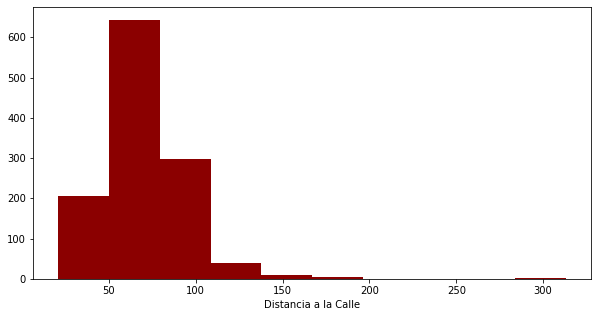

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(Distancia_Calle,facecolor="darkred")
plt.xlabel("Distancia a la Calle")
plt.show()

## **Identificar Valores Atipicos**

**Manera Visual: Boxplot**

Para dibujar el diagrama de caja necesitas conocer los valores de posición, llamados cuartiles 1 ,2 y 3. La longitud de la caja es el rango intercuartílico (q3-q1). Y la longitud de los «palos» (las líneas que salen de la caja) son los valores extremos. También necesitas saber cúales son los valores «raros» o outliers. Los dibujarás con un puntito o una crucecita.

In [ ]:
Distancia_Calle.describe()

count   1201.00
mean      70.05
std       24.28
min       21.00
25%       59.00
50%       69.00
75%       80.00
max      313.00
Name: LotFrontage, dtype: float64

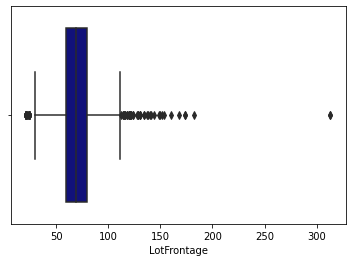

In [ ]:
sns.boxplot(x=Distancia_Calle,color="darkblue")

**Metodo del Rango Intercuantil**

In [ ]:
q1,q3 = np.percentile(Distancia_Calle,[25,75])
print(q1)
print(q3)

59.0
80.0


**Limites**

In [ ]:
RIC=(q3-q1)
print(RIC)

21.0


In [ ]:
Limite_Superior= q3+(1.5*RIC)
print(Limite_Superior)

111.5


In [ ]:
Limite_Inferior= q1-(1.5*RIC)
print(Limite_Inferior)

27.5


**Graficamos los puntos A**

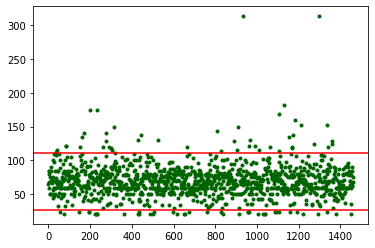

In [ ]:
plt.plot(Distancia_Calle,".",color="darkgreen")
plt.axhline(y=Limite_Inferior,color="red",linestyle="-")
plt.axhline(y=Limite_Superior,color="red",linestyle="-")
plt.show()

**Excluimos los datos Atipicos**

In [ ]:
df_sin_Calle_Atipicas=df[(df["LotFrontage"]<Limite_Superior) & (df["LotFrontage"]>Limite_Inferior)]

In [ ]:
df_sin_Calle_Atipicas.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
Distancia_Calle_sin_Atipicos=df_sin_Calle_Atipicas["LotFrontage"]

In [ ]:
Distancia_Calle_sin_Atipicos=Distancia_Calle_sin_Atipicos.dropna()

In [ ]:
Distancia_Calle_sin_Atipicos.describe()

count   1113.00
mean      68.96
std       16.66
min       30.00
25%       60.00
50%       69.00
75%       80.00
max      111.00
Name: LotFrontage, dtype: float64

In [ ]:
Promedio_Original_D

70.04995836802665

In [ ]:
Promedio_sin_Atipico=np.mean(Distancia_Calle_sin_Atipicos)
Promedio_sin_Atipico

68.95507637017072

**Histograma Sin A**

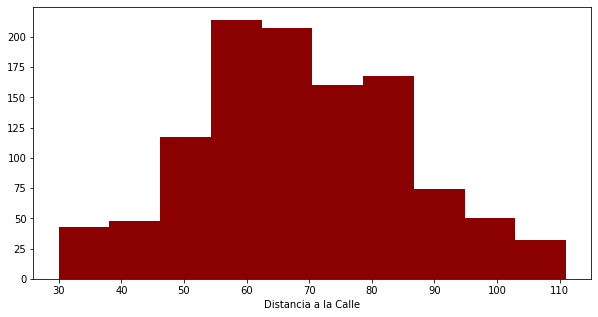

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(Distancia_Calle_sin_Atipicos,facecolor="darkred")
plt.xlabel("Distancia a la Calle")
plt.show()

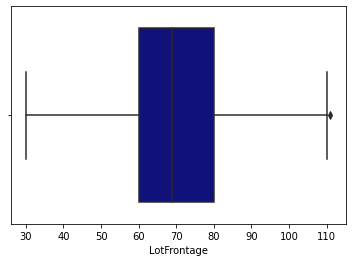

In [ ]:
sns.boxplot(x=Distancia_Calle_sin_Atipicos,color="darkblue")

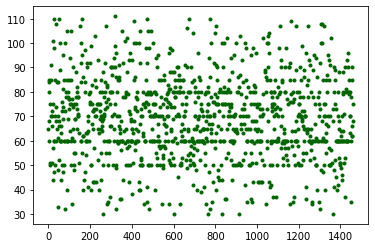

In [ ]:
plt.plot(Distancia_Calle_sin_Atipicos,".",color="darkgreen")
plt.show()

## **Validar Normalidad**

**Test de Normalidad Grafico: q-q plot**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

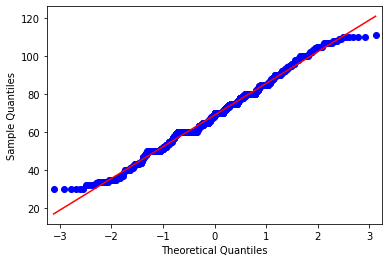

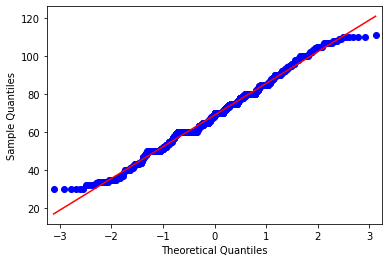

In [ ]:
qqplot(Distancia_Calle_sin_Atipicos,line="s")

**Test de Normalidad Estadistica**

Test Estadistico Prueba Estadistica de Normalidad Probar Estadisticamente:

* H0: La distribucion de la Distancia  es Normal
* Ha: La distribucion de la Distancia no es Normal

alpha=0.05

* Si p valor < 0.05, Se Rechaza Normalidad
* Si p valor > 0.05, Se Acepta Normalidad

In [ ]:
stat, p= shapiro(Distancia_Calle_sin_Atipicos)
'{:f}'.format(p)

'0.000003'

In [ ]:
if (p <= 0.05):
  print("la Variables No es Normal")
else:
  print("La Variable  es Normal")


la Variables No es Normal


**Consecuencias de la falta de normalidad**


El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

**Test de Promedio**


*  Ho= Promeido de Distancias = 70.04
* Ha = Promedios es Diferente 70.04

 alfa = 0.05

 * Si p valor < 0.05, Re rechaza h0
 * Si P valor > 0.05, Se Acepta H0

In [ ]:
from scipy.stats import ttest_1samp
print(Promedio_sin_Atipico)

68.95507637017072


In [ ]:
test,pvalor= ttest_1samp(Distancia_Calle_sin_Atipicos,Promedio_sin_Atipico)

In [ ]:
pvalor

1.0

In [ ]:
if (pvalor <= 0.05):
  print("el promedio no es el aproximado al real")
else:
  print("el Promedio es el aproximado al real")

el Promedio es el aproximado al real


## **Enfoque no Parametrico para calcular un parametro Poblacional**

**Enfoque No Parametrico** en python apenas se esta implementando, 
se hace mejor en R

**Remuestreo: Simuacion computacional**

In [ ]:
Promedio_sin_Atipico

68.95507637017072

In [ ]:
from random import sample
import math

**Seleccionamos Muestra Aleatoria**

In [ ]:
len( Distancia_Calle)

1201

In [ ]:
Muestra= Distancia_Calle.sample(n=1000,replace=False)

In [ ]:
len(Muestra)

1000

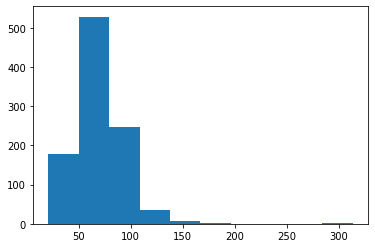

In [ ]:
plt.hist(Muestra)
plt.show()

**Remuestreo**

In [ ]:
Muestra_Promedios=[]# Lista Vacia
for i in range(100000):
  Muestra_N= Muestra.sample(n=500,replace=True)
  Muestra_Promedios.append(Muestra_N.mean())

**Medias de Medias Remuestradas**

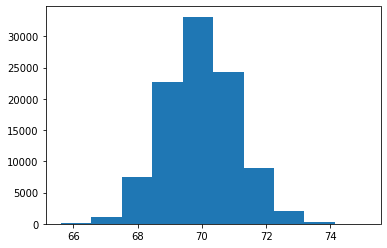

In [ ]:
plt.hist(Muestra_Promedios)
plt.show()

In [ ]:
Muestra_Promedios1=pd.Series(Muestra_Promedios)

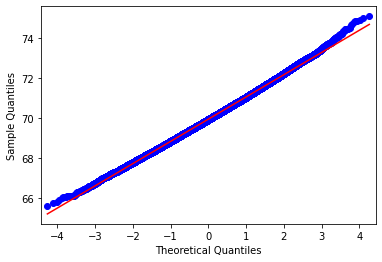

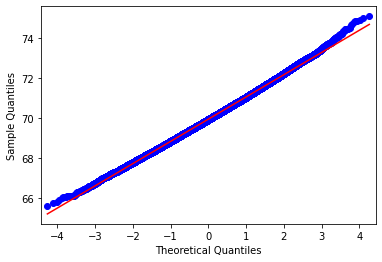

In [ ]:
qqplot(Muestra_Promedios1,line="s")

In [ ]:
Promedio_Remuestreo= np.mean(Muestra_Promedios1)
print(Promedio_Remuestreo)

69.94741635999998


In [ ]:
Promedio_sin_Atipico

68.95507637017072

## **Imputar Nas por Promedio**

In [ ]:
df["LotFrontage"]=df["LotFrontage"].replace(np.nan,Promedio_Remuestreo)

In [ ]:
df.isnull().sum()/len(df)*100

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.55
MasVnrArea      0.55
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinSF1      0.00
BsmtFinType2    2.60
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.07
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath 

## **Eliminamos Todos los Nas; ya que la proporcion que hay es pequeñas**

In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()/len(df1)*100

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.00
LotArea         0.00
Street          0.00
LotShape        0.00
LandContour     0.00
Utilities       0.00
LotConfig       0.00
LandSlope       0.00
Neighborhood    0.00
Condition1      0.00
Condition2      0.00
BldgType        0.00
HouseStyle      0.00
OverallQual     0.00
OverallCond     0.00
YearBuilt       0.00
YearRemodAdd    0.00
RoofStyle       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
MasVnrType      0.00
MasVnrArea      0.00
ExterQual       0.00
ExterCond       0.00
Foundation      0.00
BsmtQual        0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
BsmtFinSF2      0.00
BsmtUnfSF       0.00
TotalBsmtSF     0.00
Heating         0.00
HeatingQC       0.00
CentralAir      0.00
Electrical      0.00
1stFlrSF        0.00
2ndFlrSF        0.00
LowQualFinSF    0.00
GrLivArea       0.00
BsmtFullBath    0.00
BsmtHalfBath 

In [ ]:
1-len(df1)/len(df)
df=df1

* En este punto no tenemos datos perdidos, hemos perdido solo el 8 % de la data original

## **Analisis Variables Categoricas**

**Detectamos las variables categoricas**

**Variables MSZoning**


  * A	Agriculture
  * C	Commercial
  * FV	Floating Village Residential
  * I	Industrial
  * RH	Residential High Density
  * RL	Residential Low Density
  * RP	Residential Low Density Park 
  * RM	Residential Medium Density


In [ ]:
pd.value_counts(df["MSZoning"])

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

**Distribuccion %**

In [ ]:
(pd.value_counts(df["MSZoning"])/len(df))*100

RL        79.67
RM        14.28
FV         4.63
RH         0.82
C (all)    0.60
Name: MSZoning, dtype: float64

**Grafico**

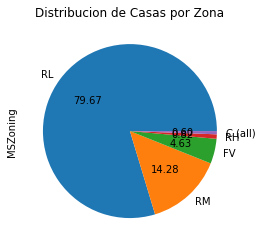

In [ ]:
plot= df["MSZoning"].value_counts().plot(kind="pie",autopct="%.2f",title="Distribucion de Casas por Zona")

**Variable Categorica Vs Categorica**

**BldgType**

* 1Fam	Single-family Detached	
* 2FmCon	Two-family Conversion; originally built as one-family dwelling
* Duplx	Duplex
* TwnhsE	Townhouse End Unit
* TwnhsI	Townhouse Inside Unit


In [ ]:
pd.value_counts(df["BldgType"])

1Fam      1138
TwnhsE     112
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

## **Analisis de Contingencia**

**Tabla Cruzada**

In [ ]:
pd.crosstab(df["BldgType"],df["MSZoning"])

MSZoning,C (all),FV,RH,RL,RM
BldgType,,,,,
1Fam,7,36,7,966,122
2fmCon,1,0,0,12,9
Duplex,0,0,2,21,5
Twnhs,0,9,0,10,19
TwnhsE,0,17,2,57,36


**Subtotales**

In [ ]:
pd.crosstab(df["BldgType"],df["MSZoning"],margins=True)

MSZoning,C (all),FV,RH,RL,RM,All
BldgType,,,,,,
1Fam,7,36,7,966,122,1138
2fmCon,1,0,0,12,9,22
Duplex,0,0,2,21,5,28
Twnhs,0,9,0,10,19,38
TwnhsE,0,17,2,57,36,112
All,8,62,11,1066,191,1338


**Test de Indepedencia**

* H0: Las Variables Tipo de casa y Zona son Independientes
* Ha: Las Variables Tipo de casa y Zona son Dependientes

* Si p valor < 0.05; se rechaza H0, Las variables Son Dependientes



**Test chi2**

In [ ]:
tc= pd.crosstab(index=df["BldgType"],columns=df["MSZoning"])

In [ ]:
c,p,pchi, test=chi2_contingency(tc)

In [ ]:
'{:f}'.format(p)

'0.000000'

**Las Variables estan relacionadas estadisticamente, por lo tanto para un posible modelo, deben incluirse**

## **Variables Categoricas con Numericas**

**ANOVA**
El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetro


**Visualmente**

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

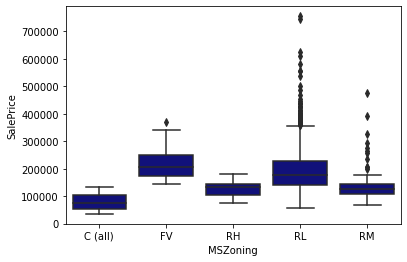

In [ ]:
sns.boxplot(x=df["MSZoning"],y=df["SalePrice"],data=df,color="darkblue")

In [ ]:
from  scipy import stats

In [ ]:
grupo= df[["MSZoning","SalePrice"]].groupby("MSZoning")
grupo.head(5)

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000
8,RM,129900
15,RM,132000
21,RM,139400
23,RM,129900
29,RM,68500


**Test Estadistico**

In [ ]:
f_val,p_val= stats.f_oneway(grupo.get_group("RL")["SalePrice"],grupo.get_group("RM")["SalePrice"],
                           grupo.get_group("FV")["SalePrice"],grupo.get_group("RH")["SalePrice"],
                           grupo.get_group("C (all)")["SalePrice"])

In [ ]:

'{:f}'.format(p_val)

'0.000000'

* **Los grupos estan relacionados con el precio de venta**

## **Numericas y Numericas**

**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: correlación lineal positiva total.
* 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
* -1: correlación lineal negativa total

In [ ]:
df.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.00,0.30,0.18,0.22,0.04,0.10,0.38,0.41,0.07,0.01,0.36,0.10,-0.00,0.17,0.04,0.25,0.01,0.32,0.23,0.27,0.33,0.07,0.14,0.02,0.06,0.03,0.19,-0.00,0.01,0.01,0.33
LotArea,0.30,1.00,0.10,0.21,0.11,-0.01,0.27,0.29,0.05,0.01,0.26,0.16,0.05,0.12,0.01,0.12,-0.01,0.19,0.26,0.14,0.17,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.25
MasVnrArea,0.18,0.10,1.00,0.25,-0.08,0.10,0.37,0.34,0.17,-0.06,0.39,0.08,0.02,0.27,0.19,0.11,-0.01,0.29,0.23,0.36,0.37,0.15,0.13,-0.11,0.02,0.05,0.01,-0.03,-0.01,-0.00,0.47
BsmtFinSF1,0.22,0.21,0.25,1.00,-0.06,-0.55,0.50,0.45,-0.15,-0.05,0.20,0.64,0.06,0.05,-0.03,-0.12,-0.04,0.05,0.25,0.20,0.28,0.19,0.11,-0.11,0.03,0.05,0.14,0.01,-0.02,0.02,0.36
BsmtFinSF2,0.04,0.11,-0.08,-0.06,1.00,-0.23,0.08,0.09,-0.11,0.01,-0.02,0.15,0.07,-0.09,-0.04,-0.01,-0.03,-0.04,0.04,-0.08,-0.05,0.06,0.00,0.05,-0.03,0.09,0.04,0.01,-0.02,0.03,-0.03
BsmtUnfSF,0.10,-0.01,0.10,-0.55,-0.23,1.00,0.36,0.32,-0.02,-0.00,0.22,-0.46,-0.11,0.31,-0.07,0.15,0.08,0.24,0.03,0.24,0.20,-0.02,0.12,-0.00,0.02,-0.02,-0.04,-0.02,0.03,-0.04,0.19
TotalBsmtSF,0.38,0.27,0.37,0.50,0.08,0.36,1.00,0.89,-0.23,-0.06,0.46,0.28,-0.02,0.35,-0.12,0.03,0.04,0.30,0.33,0.45,0.51,0.21,0.26,-0.10,0.04,0.07,0.14,-0.01,0.00,-0.00,0.60
1stFlrSF,0.41,0.29,0.34,0.45,0.09,0.32,0.89,1.00,-0.22,-0.02,0.55,0.25,-0.00,0.37,-0.15,0.10,0.06,0.39,0.40,0.44,0.50,0.23,0.23,-0.06,0.05,0.08,0.13,-0.01,0.02,-0.01,0.60
2ndFlrSF,0.07,0.05,0.17,-0.15,-0.11,-0.02,-0.23,-0.22,1.00,0.04,0.69,-0.18,-0.02,0.42,0.62,0.51,0.07,0.62,0.19,0.19,0.12,0.08,0.20,0.06,-0.02,0.04,0.08,0.01,0.04,-0.03,0.31
LowQualFinSF,0.01,0.01,-0.06,-0.05,0.01,-0.00,-0.06,-0.02,0.04,1.00,0.10,-0.03,0.00,-0.02,0.00,0.06,-0.02,0.09,0.00,-0.02,0.01,-0.01,0.02,0.05,-0.00,0.04,0.08,-0.00,-0.03,-0.02,-0.01


**Grado de Significancia Estadisticancia**

In [ ]:
pearson_coef,p_value=stats.pearsonr(df["GarageArea"],df["SalePrice"])

In [ ]:
'{:f}'.format(p_value)

'0.000000'

In [ ]:
pearson_coef

0.6075353838509896

**La correlacion entre el precio de venta y el area del garage, es estadisticamente Significativa**

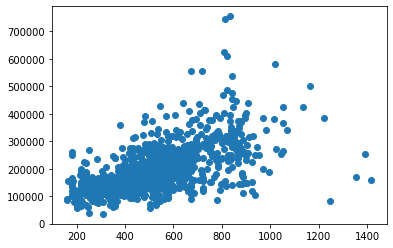

In [ ]:
plt.scatter(df["GarageArea"],df["SalePrice"])
plt.show()

**BsmtHalfBath vs Prices**

In [ ]:
pearson_coef,p_value=stats.pearsonr(df["BsmtHalfBath"],df["SalePrice"])
p_value

0.270035286659553

* No hay correlacion entre price BsmtHalfBath 

## **Seleccion de Variables Importantes**

## **Metodo de Correlacion**

**Seleccionamos Variables Numericas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1338 non-null   object  
 1   MSSubClass     1338 non-null   category
 2   MSZoning       1338 non-null   category
 3   LotFrontage    1338 non-null   float64 
 4   LotArea        1338 non-null   int64   
 5   Street         1338 non-null   category
 6   LotShape       1338 non-null   category
 7   LandContour    1338 non-null   category
 8   Utilities      1338 non-null   category
 9   LotConfig      1338 non-null   category
 10  LandSlope      1338 non-null   category
 11  Neighborhood   1338 non-null   category
 12  Condition1     1338 non-null   category
 13  Condition2     1338 non-null   category
 14  BldgType       1338 non-null   category
 15  HouseStyle     1338 non-null   category
 16  OverallQual    1338 non-null   category
 17  OverallCond    1338 non-null   ca

**Eliminar Id**

In [ ]:
df1=df.drop(["Id"],axis=1)

In [ ]:
df1.head(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


**Automatica de V numericas**

In [ ]:
Variables_Numericas=df1._get_numeric_data().columns
df2=df1[Variables_Numericas]

In [ ]:
print(df2.shape)
df2.head(2)

(1338, 31)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.00,8450,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.00,9600,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500


**Funcion**

In [ ]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    uniques=uniques.iloc[0,:]
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)
    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    #print('___________________________\nData types:\n',str.types.value_counts())
    #print('___________________________')
    return str

In [ ]:
details = rstr(df2, "SalePrice")
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1338, 31)


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr SalePrice
SalePrice,int64,1338,620,0,0.00,"[208500, 181500, 223500, 140000, 250000, 14300...",1.94,6.82,1.00
GrLivArea,int64,1338,822,0,0.00,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",1.43,5.32,0.71
GarageCars,int64,1338,4,0,0.00,"[2, 3, 1, 4]",0.20,-0.22,0.64
GarageArea,int64,1338,435,0,0.00,"[548, 460, 608, 642, 836, 480, 636, 484, 468, ...",0.81,1.17,0.61
1stFlrSF,int64,1338,727,0,0.00,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...",1.40,6.06,0.60
TotalBsmtSF,int64,1338,700,0,0.00,"[856, 1262, 920, 756, 1145, 796, 1686, 1107, 9...",2.21,18.37,0.60
FullBath,int64,1338,4,0,0.00,"[2, 1, 3, 0]",-0.01,-0.87,0.57
TotRmsAbvGrd,int64,1338,10,0,0.00,"[8, 6, 7, 9, 5, 11, 4, 10, 12, 3]",0.67,0.71,0.55
MasVnrArea,float64,1338,325,0,0.00,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",2.58,9.45,0.47
Fireplaces,int64,1338,4,0,0.00,"[0, 1, 2, 3]",0.57,-0.25,0.45


In [ ]:
num_colmnas=["GrLivArea"] # Numericas
cat_columnas=[]# Categoricas

# **4) Modelacion**

## **1) Regresion Simple**

In [ ]:
datos=df2[["SalePrice","GrLivArea"]]

**Division de Entrenamiento y Prueba**

* Mayor proporcion para entrenar
* Baja proporcion para probar

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X=datos[["GrLivArea"]]
Y=datos["SalePrice"].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

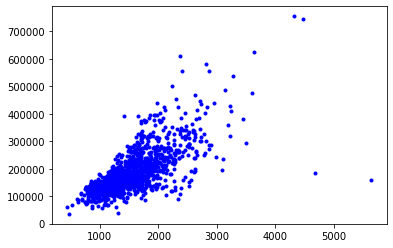

In [ ]:
plt.plot(X,Y,"b.")

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Modelo_Lineal_Simple=LinearRegression()# funcion


### **sklearn es  mas del Ml**

In [ ]:
# Entrenamiento comando fit
from sklearn.linear_model import LinearRegression
Modelo_Lineal_Simple=LinearRegression()# funcion

Modelo_Lineal_Simple.fit(x_train,y_train)


print("Intercept:", Modelo_Lineal_Simple.intercept_)
print("Coeficiente:", list(zip(X.columns, Modelo_Lineal_Simple.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", Modelo_Lineal_Simple.score(X, Y))

Intercept: 24114.690335346502
Coeficiente: [('GrLivArea', 105.62802597848591)]
Coeficiente de determinación R^2: 0.5062948282467907


**Grafico**

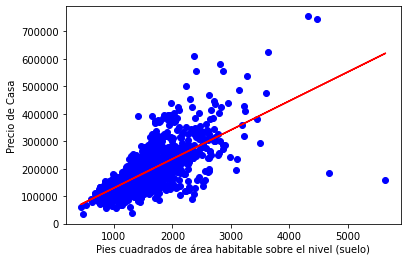

In [ ]:
# Grafica
plt.scatter(X,Y,color="blue")
plt.plot(x_train,Modelo_Lineal_Simple.coef_*x_train + Modelo_Lineal_Simple.intercept_, '-r')
plt.xlabel("Pies cuadrados de área habitable sobre el nivel (suelo)")
plt.ylabel("Precio de Casa")
plt.show()

### **Prediccion Machine Learning**

In [ ]:
prediccion_Modelo_Simple_test=Modelo_Lineal_Simple.predict(x_test)
prediccion_Modelo_Simple_train=Modelo_Lineal_Simple.predict(x_train)

**Error entranamiento**

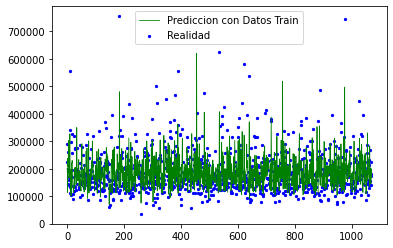

In [ ]:
x_ax= range(len(y_train))
plt.scatter(x_ax,y_train,s=5,color="blue",label="Realidad")
plt.plot(x_ax,prediccion_Modelo_Simple_train,lw=0.8,color="green",label="Prediccion con Datos Train")
plt.legend()
plt.show()

**MAPE: terminos procentuales**

**Definir una Funcion de MAPE**

In [ ]:
def MAPE(y_actual,y_predict):
  mape=np.mean(abs(y_actual-y_predict))/np.mean(y_actual)
  mape=round(mape*100,2)
  return mape

In [ ]:
MAPE1_train=MAPE(y_train,prediccion_Modelo_Simple_train)
MAPE1_train

20.19

**Mape de test**

In [ ]:
MAPE1_test=MAPE(y_test,prediccion_Modelo_Simple_test)
MAPE1_test
Mape_Regresion_Simple=MAPE1_test

* El modelo es adecuado, no sufre de sobreajuste

### **¿Es estadisticamente Significativo?**



In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# quitar notacion cientifica
from statsmodels.iolib import summary2

In [ ]:
# necesito agragar una columna de 1s
x1_train=sm.add_constant(x_train,prepend=True)
x1_train

,const,GrLivArea
815,1.00,1661
1209,1.00,1660
1368,1.00,848
279,1.00,2022
141,1.00,1734
...,...,...
81,1.00,1337
1108,1.00,1690
834,1.00,1144
370,1.00,1664


**Entrenar Modelo**

In [ ]:
Modelo_Lineal_Simple_StatsModel=sm.OLS(endog=y_train,exog=x1_train)
Modelo_Lineal_Simple_StatsModel=Modelo_Lineal_Simple_StatsModel.fit()# entreno
print(Modelo_Lineal_Simple_StatsModel.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.486     
Dependent Variable: y                AIC:                26467.3588
Date:               2021-06-23 22:30 BIC:                26477.3096
No. Observations:   1070             Log-Likelihood:     -13232.   
Df Model:           1                F-statistic:        1010.     
Df Residuals:       1068             Prob (F-statistic): 1.33e-156 
R-squared:          0.486            Scale:              3.2312e+09
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
const     24114.6903 5412.1165  4.4557 0.0000 13495.1019 34734.2788
GrLivArea   105.6280    3.3229 31.7883 0.0000    99.1080   112.1481
-------------------------------------------------------------------
Omnibus:             186.472       Durbin-Watson:          1.941  

* GrLivArea es estadisticamente significativa
* Cuando aumento el en una unidad el area cosntruida de la casa, el precio aumenta en 108.4 Dolares en promedio.
*  A nivel general el modelo es significativo
* R2= 50%; significa, que la variable Tamaño esplica, la variabilidad del precio de la casa en un 50%

**Intervalos de Confianza**

In [ ]:
Modelo_Lineal_Simple_StatsModel.conf_int(alpha=0.05)

,0,1
const,13495.10,34734.28
GrLivArea,99.11,112.15


**Validar el Modelo: los residuales del entrenamiento**

In [ ]:
x1_test=sm.add_constant(x_test,prepend=True)
prediccion_Modelo_Simple_train_StastModels=Modelo_Lineal_Simple_StatsModel.predict(exog=x1_train)
# Residuales
Residuales=prediccion_Modelo_Simple_train_StastModels-y_train

**Prueba de Normalidad de los residuales**

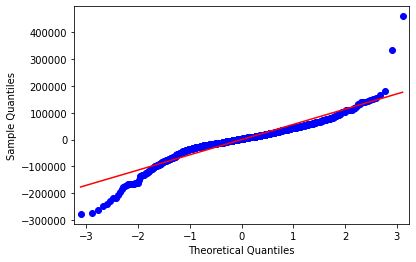

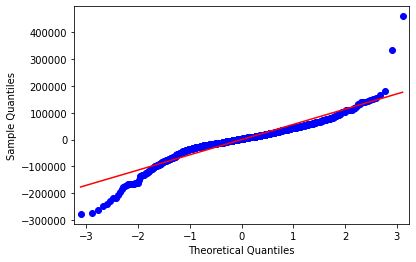

In [ ]:
qqplot(Residuales,line="s")

**test Normalidad** 

- H0: los residuales son Normales
- Ha: los residuales no son normales

* Si p valor < 0.05; los residuales no son Normales


In [ ]:
#  Normalidad de los residuos Shapiro-Wilk test
shapiro_test=stats.shapiro(Residuales)
shapiro_test
# Normalidad de los residuos D'Agostino's K-squared test
k2,p_value=stats.normaltest(Residuales)
p_value

3.222067045338781e-41

**Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).**

* Por lo tanto el Modelo no es el Adecuado

## **2) Modelo de Regresion Multiple**

### **Solo Variables Numericas**

In [ ]:
details = rstr(df2, "SalePrice")
display(details.sort_values(by='corr SalePrice', ascending=False))

Data shape: (1338, 31)


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr SalePrice
SalePrice,int64,1338,620,0,0.00,"[208500, 181500, 223500, 140000, 250000, 14300...",1.94,6.82,1.00
GrLivArea,int64,1338,822,0,0.00,"[1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...",1.43,5.32,0.71
GarageCars,int64,1338,4,0,0.00,"[2, 3, 1, 4]",0.20,-0.22,0.64
GarageArea,int64,1338,435,0,0.00,"[548, 460, 608, 642, 836, 480, 636, 484, 468, ...",0.81,1.17,0.61
1stFlrSF,int64,1338,727,0,0.00,"[856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...",1.40,6.06,0.60
TotalBsmtSF,int64,1338,700,0,0.00,"[856, 1262, 920, 756, 1145, 796, 1686, 1107, 9...",2.21,18.37,0.60
FullBath,int64,1338,4,0,0.00,"[2, 1, 3, 0]",-0.01,-0.87,0.57
TotRmsAbvGrd,int64,1338,10,0,0.00,"[8, 6, 7, 9, 5, 11, 4, 10, 12, 3]",0.67,0.71,0.55
MasVnrArea,float64,1338,325,0,0.00,"[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...",2.58,9.45,0.47
Fireplaces,int64,1338,4,0,0.00,"[0, 1, 2, 3]",0.57,-0.25,0.45


* Seleccionamos hasta 0.3
* Tomamos dos relacioones negativas

In [ ]:
df=df1

In [ ]:
num_colmnas=["GrLivArea","GarageCars","GarageArea",
             "1stFlrSF","TotalBsmtSF","FullBath","TotRmsAbvGrd","MasVnrArea","Fireplaces",
             "BsmtFinSF1","LotFrontage","OpenPorchSF","2ndFlrSF","WoodDeckSF","EnclosedPorch"]

In [ ]:
X=df[num_colmnas]
Y=df["SalePrice"].values

**Dividir en train y test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

**Entreanamos con StastModels**

In [ ]:
x1_train=sm.add_constant(x_train,prepend=True)
x1_train

,const,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,OpenPorchSF,2ndFlrSF,WoodDeckSF,EnclosedPorch
994,1.00,1718,3,786,1718,1700,2,7,230.00,1,1172,96.00,48,0,216,0
1229,1.00,1507,1,404,1507,1075,2,7,0.00,0,666,70.00,0,0,0,0
958,1.00,1337,2,531,1337,1337,2,6,0.00,0,699,65.00,39,0,0,0
634,1.00,1056,2,576,1056,1056,0,4,0.00,0,1056,64.00,56,0,264,0
606,1.00,1040,2,576,1040,1040,1,6,0.00,0,732,82.00,0,0,168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.00,2462,2,576,1392,1392,2,9,456.00,1,57,134.00,132,1070,239,0
630,1.00,1750,1,240,1089,636,1,8,0.00,0,0,50.00,0,661,0,293
1239,1.00,1484,2,472,1484,1476,2,6,32.00,1,428,64.00,33,0,120,0
1097,1.00,1088,2,461,1088,1074,1,5,0.00,0,0,69.95,74,0,0,137


In [ ]:
Modelo_Lineal_Multiple_Numericas_StatsModel=sm.OLS(endog=y_train,exog=x1_train)
Modelo_Lineal_Multiple_Numericas_StatsModel=Modelo_Lineal_Multiple_Numericas_StatsModel.fit()# entreno
print(Modelo_Lineal_Multiple_Numericas_StatsModel.summary2())

                     Results: Ordinary least squares
Model:                 OLS                Adj. R-squared:       0.703     
Dependent Variable:    y                  AIC:                  25938.4759
Date:                  2021-06-23 22:30   BIC:                  26018.0825
No. Observations:      1070               Log-Likelihood:       -12953.   
Df Model:              15                 F-statistic:          169.9     
Df Residuals:          1054               Prob (F-statistic):   1.52e-268 
R-squared:             0.707              Scale:                1.9456e+09
--------------------------------------------------------------------------
                 Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
--------------------------------------------------------------------------
const         -31221.8386 7448.9429 -4.1914 0.0000 -45838.2828 -16605.3944
GrLivArea        -19.3700   36.0545 -0.5372 0.5912    -90.1168     51.3768
GarageCars     30814.5753 4048.3769  7.6116 0.0

* Significancia Global, Pasa
* Significancia Individual: 7 de 15 no son Importantes o estadistiacamente Significativas. Podemos tener problemas de multicolinealidad

### **Prediccion Modelo**

In [ ]:
X1_test = sm.add_constant(x_test, prepend=True)
predicciones = Modelo_Lineal_Multiple_Numericas_StatsModel.predict(exog = X1_test)
predicciones_train = Modelo_Lineal_Multiple_Numericas_StatsModel.predict(exog = x1_train)

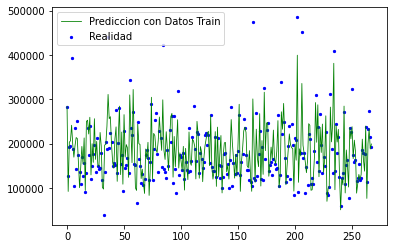

In [ ]:
x_ax= range(len(y_test))
plt.scatter(x_ax,y_test,s=5,color="blue",label="Realidad")
plt.plot(x_ax,predicciones,lw=0.8,color="green",label="Prediccion con Datos Train")
plt.legend()
plt.show()

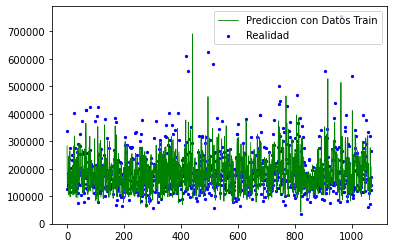

In [ ]:
x_ax= range(len(y_train))
plt.scatter(x_ax,y_train,s=5,color="blue",label="Realidad")
plt.plot(x_ax,predicciones_train,lw=0.8,color="green",label="Prediccion con Datos Train")
plt.legend()
plt.show()

**Error de test**

In [ ]:
Mape_Regresion_Multiple=MAPE(y_test,predicciones)
Mape_Regresion_Multiple


15.88

Erro train


In [ ]:
MAPE(y_train,predicciones_train)

14.5

### **Diagnostico del Modelo**

* Son las Variables Significativas:

si p valor de la variables > 0.05, la Variable no es significativa

In [ ]:
# Quitar notacion cientfica
pd.options.display.float_format='{:.2f}'.format
print(Modelo_Lineal_Multiple_Numericas_StatsModel.pvalues)

const           0.00
GrLivArea       0.59
GarageCars      0.00
GarageArea      0.57
1stFlrSF        0.09
TotalBsmtSF     0.00
FullBath        0.00
TotRmsAbvGrd    0.49
MasVnrArea      0.00
Fireplaces      0.00
BsmtFinSF1      0.00
LotFrontage     0.80
OpenPorchSF     0.61
2ndFlrSF        0.06
WoodDeckSF      0.00
EnclosedPorch   0.14
dtype: float64


In [ ]:
x_train.shape

(1070, 15)

 * De las 15 Variables, 8 variables no son significativas; puede ser por problemas de Multicolinealidad.


**Normalidad Residuales**

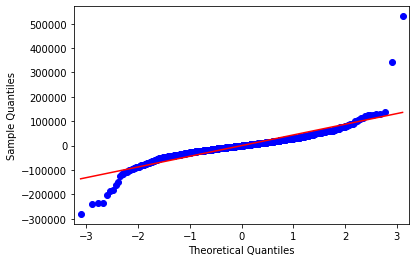

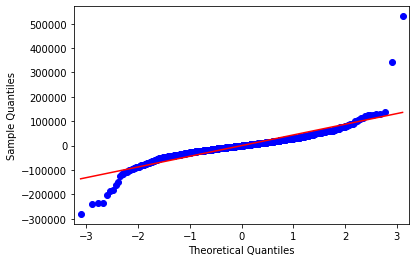

In [ ]:
# Residuales
Residuales=predicciones_train-y_train
qqplot(Residuales,line="s")

**Test Normalidad**

In [ ]:
#  Normalidad de los residuos Shapiro-Wilk test
shapiro_test=stats.shapiro(Residuales)
print(shapiro_test)
# Normalidad de los residuos D'Agostino's K-squared test
k2,p_value=stats.normaltest(Residuales)
print(p_value)

(0.8193961381912231, 5.1204284129269294e-33)
9.783558744832002e-107


* p valor < 0.05, por lo tanto no hay normalidad y el modelo no es adecuado para hacer inferencia.

**Intervalos de Confianza**

In [ ]:
## Parametros
Modelo_Lineal_Multiple_Numericas_StatsModel.params


const           -31221.84
GrLivArea          -19.37
GarageCars       30814.58
GarageArea           7.74
1stFlrSF            62.74
TotalBsmtSF         32.22
FullBath         15389.15
TotRmsAbvGrd      1098.95
MasVnrArea          46.17
Fireplaces       12558.37
BsmtFinSF1          13.76
LotFrontage        -17.31
OpenPorchSF         11.58
2ndFlrSF            67.11
WoodDeckSF          44.66
EnclosedPorch      -35.08
dtype: float64

**Interlos Confianza**

In [ ]:
print(Modelo_Lineal_Multiple_Numericas_StatsModel.conf_int(alpha=0.05))

                      0         1
const         -45838.28 -16605.39
GrLivArea        -90.12     51.38
GarageCars     22870.78  38758.37
GarageArea       -19.21     34.69
1stFlrSF          -9.93    135.42
TotalBsmtSF       16.53     47.92
FullBath        8555.43  22222.87
TotRmsAbvGrd   -1990.20   4188.10
MasVnrArea        29.67     62.68
Fireplaces      7661.99  17454.74
BsmtFinSF1         6.74     20.78
LotFrontage     -153.84    119.22
OpenPorchSF      -32.41     55.57
2ndFlrSF          -3.79    138.01
WoodDeckSF        22.69     66.63
EnclosedPorch    -81.19     11.03


### **Detectar Multicolinealidad**

* Detectando multicolinealidad con VIF – Python

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [ ]:
tabla_vif= pd.DataFrame()
tabla_vif["Variables"] = x_train.columns

tabla_vif["VIF"]=[variance_inflation_factor( x_train.values,i)
for i in range(len( x_train.columns))]

tabla_vif


,Variables,VIF
0,GrLivArea,1895.56
1,GarageCars,34.48
2,GarageArea,29.91
3,1stFlrSF,1171.00
4,TotalBsmtSF,49.02
5,FullBath,18.05
6,TotRmsAbvGrd,43.51
7,MasVnrArea,1.79
8,Fireplaces,2.78
9,BsmtFinSF1,3.08


### **Elimacion de Variables por VIF y algo logica de negocio**

In [ ]:
X1=X.drop(["GarageArea","2ndFlrSF","1stFlrSF","GarageCars","TotRmsAbvGrd","TotalBsmtSF","FullBath","LotFrontage"],axis=1)

tabla_vif= pd.DataFrame()
tabla_vif["Variables"] = X1.columns

tabla_vif["VIF"]=[variance_inflation_factor( X1.values,i)
for i in range(len( X1.columns))]

tabla_vif

,Variables,VIF
0,GrLivArea,5.06
1,MasVnrArea,1.61
2,Fireplaces,2.59
3,BsmtFinSF1,2.22
4,OpenPorchSF,1.75
5,WoodDeckSF,1.78
6,EnclosedPorch,1.18


## **3) Modelo de Regresion por Elimacion VIF**

In [ ]:
 X1.columns

Index(['GrLivArea', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'OpenPorchSF',
       'WoodDeckSF', 'EnclosedPorch'],
      dtype='object')

In [ ]:
num_colmnas= X1.columns
X1=df[num_colmnas]

**Hacemos la train y test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y,train_size=0.8)

### **Entranamiento**

In [ ]:
x1_train=sm.add_constant(x_train,prepend=True)
Modelo_Lineal_Multiple_VIF=sm.OLS(endog=y_train,exog=x1_train)
Modelo_Lineal_Multiple_VIF=Modelo_Lineal_Multiple_VIF.fit()# entreno
print(Modelo_Lineal_Multiple_VIF.summary2())

                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.596     
Dependent Variable:   y                 AIC:                 26203.2159
Date:                 2021-06-23 22:30  BIC:                 26243.0192
No. Observations:     1070              Log-Likelihood:      -13094.   
Df Model:             7                 F-statistic:         226.6     
Df Residuals:         1062              Prob (F-statistic):  1.05e-205 
R-squared:            0.599             Scale:               2.5103e+09
-----------------------------------------------------------------------
                Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------
const         33587.4705 4997.5102  6.7208 0.0000 23781.3546 43393.5864
GrLivArea        76.1523    3.7520 20.2962 0.0000    68.7900    83.5145
MasVnrArea       79.1915    9.3498  8.4699 0.0000    60.8454    97.5375
Fireplaces  

### **Significacancia de Variables**

* Todas las Variables son estadisticamente Significativas
* R2= 60%, Significa que la varibilidad del precio de las casas es explicada en un 60% por la variablidad conjunta de todas las variables
del modelo.

**Intepretacion**
* GrLivArea:76.4740; Que cuando se aumenta en 1 unidad de area construidad, el precio de la casa aumenta en promedio en 76 Dolares.


**Intrevalo de confianza**

In [ ]:
print(Modelo_Lineal_Multiple_VIF.conf_int(alpha=0.05))

                     0        1
const         23781.35 43393.59
GrLivArea        68.79    83.51
MasVnrArea       60.85    97.54
Fireplaces     8050.61 18779.88
BsmtFinSF1       16.89    30.79
OpenPorchSF      37.84   138.08
WoodDeckSF       39.74    89.29
EnclosedPorch  -148.26   -48.13


### **Diagnotico**

In [ ]:
predicciones_train = Modelo_Lineal_Multiple_VIF.predict(exog = x1_train)
Residuales=predicciones_train-y_train

**Test de Normalidad**

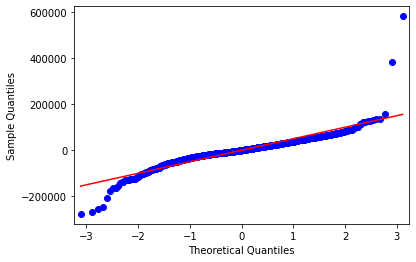

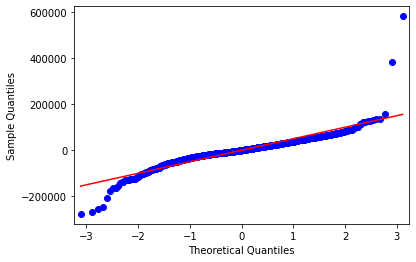

In [ ]:
# Residuales
Residuales=predicciones_train-y_train
qqplot(Residuales,line="s")

In [ ]:
#  Normalidad de los residuos Shapiro-Wilk test
shapiro_test=stats.shapiro(Residuales)
print(shapiro_test)
# Normalidad de los residuos D'Agostino's K-squared test
k2,p_value=stats.normaltest(Residuales)
print(p_value)

(0.8541229367256165, 2.576518859714243e-30)
1.9089856904873972e-94


### **Bootstrapping para calcular intervalos de confianza**

In [ ]:
Modelo_Lineal_Multiple_VIF.params

const           33587.47
GrLivArea          76.15
MasVnrArea         79.19
Fireplaces      13415.25
BsmtFinSF1         23.84
OpenPorchSF        87.96
WoodDeckSF         64.52
EnclosedPorch     -98.20
dtype: float64

In [ ]:
n_simulaciones = 5000 # remuestreo
coef_simulados = np.zeros(shape= (n_simulaciones, 8), dtype=float) 

for i in np.arange(n_simulaciones):
   Muestra_N= df.sample(n=1000,replace=True)
   X_Remuestreo=Muestra_N[num_colmnas]
   Y_Remuestreo=Muestra_N["SalePrice"].values
   X_Remuestreo1=sm.add_constant(X_Remuestreo,prepend=True)
   Modelos_temp=sm.OLS(endog=Y_Remuestreo,exog= X_Remuestreo1)
   Modelos_temp=Modelos_temp.fit()
   coef_simulados[i,:]=Modelos_temp.params

# Calculo de los intervalos de confianza por  Quantiles 
Intervalos_Empericos= np.quantile(coef_simulados,q=[0.25,0.75],axis=0)
# Formato tabla Intervalos_Empericos
Intervalos_Empericos=pd.DataFrame(data=Intervalos_Empericos,
                                  index=["25%","75%"],
                                  columns=Modelo_Lineal_Multiple_VIF.conf_int().index)



In [ ]:
Intervalos_Empericos

,const,GrLivArea,MasVnrArea,Fireplaces,BsmtFinSF1,OpenPorchSF,WoodDeckSF,EnclosedPorch
25%,15143.38,73.33,60.99,9475.22,19.15,71.41,45.00,-113.76
75%,39094.87,86.73,80.32,14080.04,38.12,118.67,68.04,-85.37


In [ ]:
print(Modelo_Lineal_Multiple_VIF.conf_int(alpha=0.05))

                     0        1
const         23781.35 43393.59
GrLivArea        68.79    83.51
MasVnrArea       60.85    97.54
Fireplaces     8050.61 18779.88
BsmtFinSF1       16.89    30.79
OpenPorchSF      37.84   138.08
WoodDeckSF       39.74    89.29
EnclosedPorch  -148.26   -48.13


In [ ]:
Modelo_Lineal_Multiple_VIF.params

const           33587.47
GrLivArea          76.15
MasVnrArea         79.19
Fireplaces      13415.25
BsmtFinSF1         23.84
OpenPorchSF        87.96
WoodDeckSF         64.52
EnclosedPorch     -98.20
dtype: float64

### **Evaluar Poder Predictivos**

In [ ]:
X1_test = sm.add_constant(x_test, prepend=True)
predicciones = Modelo_Lineal_Multiple_VIF.predict(exog = X1_test)
#predicciones_train = Modelo_Lineal_Multiple_VIF.predict(exog = x1_train)
Mape_Regresion_Multiple_VIF=MAPE(y_test,predicciones)
Mape_Regresion_Multiple_VIF

17.76

## **4) Regresion Lineal M con Variables Catgoricas**

**Funcion para crear dummyes**

In [ ]:

def tabla_con_variables_seleccionadas(num_columnas, cat_columnas):
  
  if cat_columnas != []: # Si se selecciona variables categóricas:
    # Conviertalas en variables dummy
    datos_filtro_dummies = pd.get_dummies(datos_filtro[cat_columnas],
                                          drop_first=True)# elimanar la primera
    # Concatene en una sola tabla
    X = pd.concat([datos_filtro[num_columnas], datos_filtro_dummies],
                  axis=1, sort=False)
  
  else: # Sino solo use las variables numéricas
    X = datos_filtro[num_columnas].apply
  
  return X

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

WD       1158
New       117
COD        42
ConLD       6
ConLw       4
ConLI       4
CWD         4
Con         2
Oth         1
Name: SaleType, dtype: int64

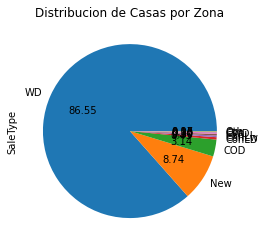

In [ ]:

plot= df["SaleType"].value_counts().plot(kind="pie",autopct="%.2f",title="Distribucion de Casas por Zona")
pd.value_counts(df["SaleType"])

In [ ]:
num_columnas=X1.columns
cat_columnas=["BldgType","SaleType"]

In [ ]:
datos_filtro=df
x= tabla_con_variables_seleccionadas(num_columnas,cat_columnas)

In [ ]:
x.head(3)
x.shape

(1338, 19)

In [ ]:
x=x.drop(["OpenPorchSF","BldgType_TwnhsE","SaleType_CWD","SaleType_ConLD","SaleType_ConLI","SaleType_ConLw","SaleType_Oth"],axis=1)

In [ ]:
y=datos_filtro["SalePrice"].values

### **Dididir en entrenamiento y test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

### **Entrenar el Modelo, dos iteracion**

In [ ]:
x1_train=sm.add_constant(x_train,prepend=True)
Modelo_Lineal_Multiple_Dummys=sm.OLS(endog=y_train,exog=x1_train)
Modelo_Lineal_Multiple_Dummys=Modelo_Lineal_Multiple_Dummys.fit()# entreno
print(Modelo_Lineal_Multiple_Dummys.summary2())

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.726     
Dependent Variable:    y                   AIC:                   25880.1765
Date:                  2021-06-23 22:31    BIC:                   25939.8814
No. Observations:      1070                Log-Likelihood:        -12928.   
Df Model:              11                  F-statistic:           258.7     
Df Residuals:          1058                Prob (F-statistic):    9.57e-291 
R-squared:             0.729               Scale:                 1.8493e+09
----------------------------------------------------------------------------
                   Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const             1177.0876 7506.6026  0.1568 0.8754 -13552.4336  15906.6087
GrLivArea           88.3328    3.0574 28.8913 0.0000     82.3335     94.3321
MasVnrArea          57

* SaleType_Con: es estadisticamente significativa, la estimacion es 82.015. signiofica que en promedio una casa vale 82 052 dolares si el tipo de venta es CON, en comparacion cuando el tipo de venta es WD.


### **DIagnosticos**

In [ ]:
x1_test=sm.add_constant(x_test,prepend=True)
prediccion_train=Modelo_Lineal_Multiple_Dummys.predict(exog=x1_train)
# Residuales
Residuales=prediccion_train-y_train

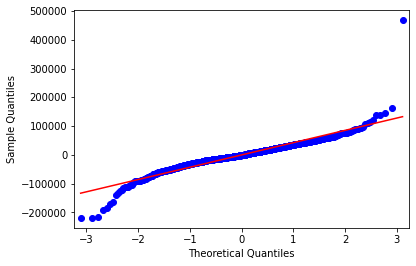

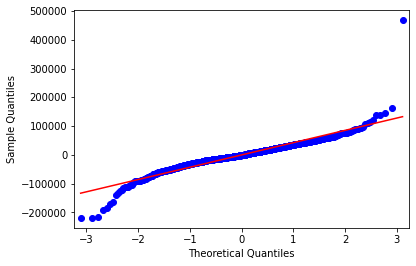

In [ ]:
qqplot(Residuales,line="s")

In [ ]:
#  Normalidad de los residuos Shapiro-Wilk test
shapiro_test=stats.shapiro(Residuales)
shapiro_test
# Normalidad de los residuos D'Agostino's K-squared test
k2,p_value=stats.normaltest(Residuales)
p_value

9.413638225733238e-68

**Intervalos hacer bootsraping**

### **Poder predictivo**

In [ ]:
X1_test = sm.add_constant(x_test, prepend=True)
predicciones = Modelo_Lineal_Multiple_Dummys.predict(exog = X1_test)
#predicciones_train = Modelo_Lineal_Multiple_VIF.predict(exog = x1_train)
Mape_Regresion_Dummys=MAPE(y_test,predicciones)
Mape_Regresion_Dummys

17.75

## **5) Modelo de Regresion por Stochastic Gradient Descent:**


In [ ]:
from sklearn.linear_model import  SGDRegressor
from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Modelo_Gradiente_Des=make_pipeline(StandardScaler(),
                                   SGDRegressor(max_iter=5000,tol=1e-3,eta0=0.01))

# Ajustar el Modelo
Modelo_Gradiente_Des.fit(x_train,y_train)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=5000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

### **Poder Predictivo**

In [ ]:
predicciones=Modelo_Gradiente_Des.predict(x_test)
Modelo_Gradiente_Des=MAPE(y_test,predicciones)
Modelo_Gradiente_Des

17.67

## **6) Arbol de Regresion**

Los árboles de regresión son el subtipo de árboles de predicción que se aplica cuando la variable respuesta es continua. En términos generales, en el entrenamiento de un árbol de regresión, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. Cuando se quiere predecir una nueva observación, se recorre el árbol acorde al valor de sus predictores hasta alcanzar uno de los nodos terminales. La predicción del árbol es la media de la variable respuesta de las observaciones de entrenamiento que están en ese mismo nodo terminal.

In [ ]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.tree import  plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


In [ ]:
# Crear el Modelo
Modelo_AR= DecisionTreeRegressor(max_depth=4,random_state=123)

In [ ]:
# Entrenamos el Modelo
Modelo_AR.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

**Pintar el Arbol**

In [ ]:
x_train.head(2)

,GrLivArea,MasVnrArea,Fireplaces,BsmtFinSF1,WoodDeckSF,EnclosedPorch,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,SaleType_Con,SaleType_New,SaleType_WD
1083,1251,425.00,2,553,0,0,0,0,0,0,0,1
656,1053,54.00,0,806,0,0,0,0,0,0,0,1


[Text(167.4, 195.696, 'X[0] <= 1822.0\nmse = 6747029630.073\nsamples = 1070\nvalue = 189955.045'),
 Text(83.7, 152.208, 'X[0] <= 1401.0\nmse = 2646170724.464\nsamples = 811\nvalue = 163016.592'),
 Text(41.85, 108.72, 'X[0] <= 1197.5\nmse = 1042577424.221\nsamples = 454\nvalue = 137564.145'),
 Text(20.925, 65.232, 'X[3] <= 435.5\nmse = 585335175.216\nsamples = 274\nvalue = 126091.704'),
 Text(10.4625, 21.744, 'mse = 534791602.267\nsamples = 115\nvalue = 111447.687'),
 Text(31.387500000000003, 21.744, 'mse = 354606821.941\nsamples = 159\nvalue = 136683.289'),
 Text(62.775000000000006, 65.232, 'X[3] <= 610.0\nmse = 1233274076.454\nsamples = 180\nvalue = 155027.75'),
 Text(52.3125, 21.744, 'mse = 1089675802.69\nsamples = 117\nvalue = 145436.265'),
 Text(73.2375, 21.744, 'mse = 1011811438.25\nsamples = 63\nvalue = 172840.508'),
 Text(125.55000000000001, 108.72, 'X[3] <= 910.5\nmse = 2813933269.671\nsamples = 357\nvalue = 195384.689'),
 Text(104.625, 65.232, 'X[5] <= 16.0\nmse = 1502501941.2

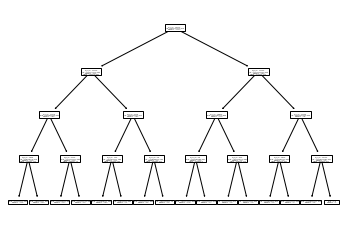

In [ ]:
plot_tree(Modelo_AR)

**Mejorando el Grafico**

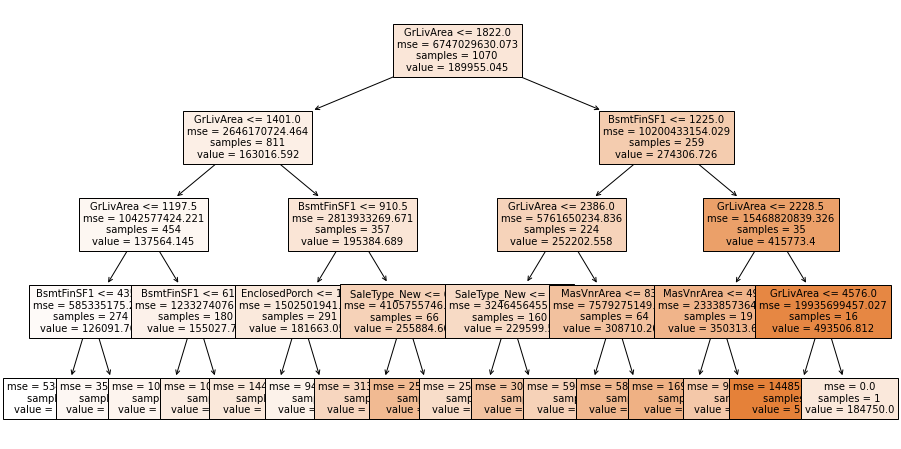

In [ ]:
#datos_filtro.drop(columns="SalePrice").columns
fig, ax = plt.subplots(figsize=(15, 8))
plot=plot_tree(decision_tree=Modelo_AR,
                feature_names=x.columns,
               class_names="SalePrice",
               filled        = True,
               fontsize      = 10)

**Importancia de predictores**

In [ ]:
Importancia_Variables= pd.DataFrame({"Predictor":x.columns,
                                     "Importancia": Modelo_AR.feature_importances_})

Importancia_Variables.sort_values("Importancia",ascending=False)

,Predictor,Importancia
0,GrLivArea,0.71
3,BsmtFinSF1,0.22
10,SaleType_New,0.03
1,MasVnrArea,0.02
5,EnclosedPorch,0.01
2,Fireplaces,0.00
4,WoodDeckSF,0.00
6,BldgType_2fmCon,0.00
7,BldgType_Duplex,0.00
8,BldgType_Twnhs,0.00


### **Predicción y evaluación del modelo**

In [ ]:
predicciones= Modelo_AR.predict(X=x_test)
MAPE_AR=MAPE(y_test,predicciones)
MAPE_AR

18.24

## **7) Modelo Random Forest**

El término ensamblador significa grupo. Los métodos tipo ensamblador están formados de un grupo de modelos predictivos que permiten alcanzar una mejor precisión y estabilidad del modelo. Estos proveen una mejora significativa a los modelos de árboles de decisión.

¿Por qué surgen los ensambladores de árboles?

Así como todos los modelos, un árbol de decisión también sufre de los problemas de sesgo y varianza. Es decir, ‘cuánto en promedio son los valores predecidos diferentes de los valores reales’ (sesgo) y ‘cuan diferentes serán las predicciones de un modelo en un mismo punto si muestras diferentes se tomaran de la misma población’ (varianza).

Al construir un árbol pequeño se obtendrá un modelo con baja varianza y alto sesgo. Normalmente, al incrementar la complejidad del modelo, se verá una reducción en el error de predicción debido a un sesgo más bajo en el modelo. En un punto el modelo será muy complejo y se producirá un sobre-ajuste del modelo el cual empezará a sufrir de varianza alta.

El modelo óptimo debería mantener un balance entre estos dos tipos de errores. A esto se le conoce como “trade-off” (equilibrio) entre errores de sesgo y varianza. El uso de ensambladores es una forma de aplicar este “trade-off”.

**Ventajas**

* Random Forest se considera como la “panacea” en todos los problemas de ciencia de datos.
* Util para regresión y clasificación.
* Un grupo de modelos “débiles”, se combinan en un modelo robusto.
* Sirve como una técnica para reducción de la dimensionalidad.
* Se generan múltiples árboles (a diferencia de CART).
* Cada árbol da una classificación (vota por una clase). Y el resultado es la clase con mayor número de votos en todo el bosque (forest).
* Para regresión, se toma el promedio de las salidas (predicciones) de todos los árboles.

**Desventajas de Random Forest**

* Pérdida de interpretación
* Bueno para clasificación, no tanto para regresión. Las predicciones no son de naturaleza continua.
* En regresión, no puede predecir más allá del rango de valores del conjunto de entrenamiento.
* Poco control en lo que hace el modelo (modelo caja negra para modeladores estadísticos)

In [ ]:
 from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo_RF = RandomForestRegressor(
            n_estimators = 500,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            n_jobs       = -1,
            random_state = 123
         )


In [ ]:
modelo_RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
predicciones= modelo_RF.predict(X=x_test)
MAPE_RF=MAPE(y_test,predicciones)
MAPE_RF

15.16

## **8) Las Maquinas de Soporte Vectorial**
* Support Vector Machines Succinctly by Alexandre Kowalczyk

In [ ]:
from sklearn.svm import SVR

### **8-A) MSV Kernel Lineal**

In [ ]:
Modelo_SVM_Lineal=SVR(kernel="linear").fit(x_train,y_train)

In [ ]:
Prediccion_SVML=Modelo_SVM_Lineal.predict(x_test)

In [ ]:
MAPE_SVM_L=MAPE(y_test,Prediccion_SVML)
MAPE_SVM_L

18.55

### **8-B) MSV Kernel Polinomio**

In [ ]:
grado=3
Modelo_SVM_P=SVR(kernel="poly",degree=grado).fit(x_train,y_train)
predicciones=Modelo_SVM_P.predict(x_test)
MAPE_SVM_P=MAPE(y_test,predicciones)
MAPE_SVM_P

26.6

### **8-C) MSV Kernel Radial**

In [ ]:
Modelo_SVM_R= SVR(kernel="rbf",epsilon=.1).fit(x_train,y_train)
predicciones=Modelo_SVM_R.predict(x_test)
MAPE_SVM_R=MAPE(y_test,predicciones)
MAPE_SVM_R

26.66

## **Estandarizar Variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

S=MinMaxScaler()
#StandardScaler

In [ ]:
x_train_S=S.fit_transform(x_train)
x_test_S=S.fit_transform(x_test)

### **(8-D SVM_Polinomio Escalando Variables)**

In [ ]:
grado=3
Modelo_SVM_P_S=SVR(kernel="poly",degree=grado).fit(x_train_S,y_train)
predicciones=Modelo_SVM_P_S.predict(x_test_S)
MAPE_SVM_P_S=MAPE(y_test,predicciones)
MAPE_SVM_P_S

26.65

# **5) Evaluar Modelos**

In [ ]:
df_comparacion_Modelos=pd.DataFrame({
    "Modelos":["Regresion Simple","Regresion Multiple","Regresion VIF","Modelo con Dummys","Modelo Gradiente Des","Arbol D",
               "RF","Maquina SVL","SVM P","SVM R","SVM P Scaled"],
    "Mape":[Mape_Regresion_Simple,Mape_Regresion_Multiple,Mape_Regresion_Multiple_VIF,Mape_Regresion_Dummys,Modelo_Gradiente_Des,MAPE_AR,
            MAPE_RF,MAPE_SVM_L,MAPE_SVM_P,MAPE_SVM_R,MAPE_SVM_P_S]
    
})

In [ ]:
df_comparacion_Modelos.sort_values("Mape",ascending=True)

,Modelos,Mape
6,RF,15.16
1,Regresion Multiple,15.88
4,Modelo Gradiente Des,17.67
3,Modelo con Dummys,17.75
2,Regresion VIF,17.76
0,Regresion Simple,17.79
5,Arbol D,18.24
7,Maquina SVL,18.55
8,SVM P,26.64
10,SVM P Scaled,26.65


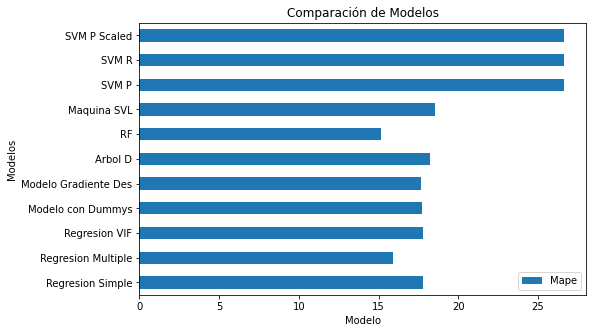

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
df_comparacion_Modelos.set_index("Modelos").plot(kind="barh",ax=ax)
ax.set_xlabel("MAPE")
ax.set_xlabel("Modelo")
ax.set_title("Comparación de Modelos");